In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [164]:
data = pd.read_csv('comma/titanic_train.csv',)
test_data = pd.read_csv('comma/titanic_test.csv')

In [165]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [166]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [167]:
data = data.drop('PassengerId', axis = 1)

In [168]:
submission_index = test_data["PassengerId"]

In [169]:
test_data = test_data.drop('PassengerId', axis = 1)

In [170]:
data['Sex'] = pd.get_dummies(data['Sex'])        

In [171]:
test_data['Sex'] = pd.get_dummies(test_data['Sex'])

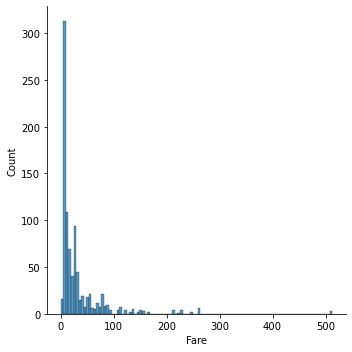

In [172]:
sns.displot(data['Fare'])

In [173]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S


In [174]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [175]:
test_data['Sex'].corr(test_data['Pclass'])

-0.10861452091523419

In [176]:
data['Sex'].corr(data['Survived'])

0.5433513806577551

<AxesSubplot:>

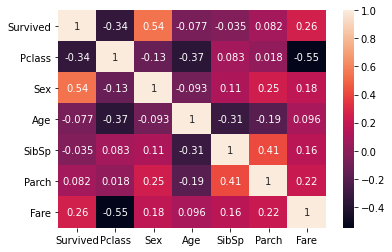

In [177]:
sns.heatmap(data.corr(), annot = True)

In [178]:
type(data["Survived"][0])

numpy.int64

<AxesSubplot:>

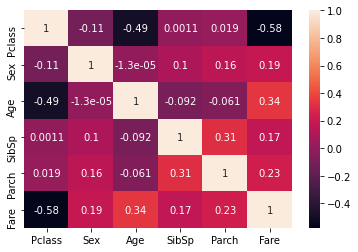

In [179]:
sns.heatmap(test_data.corr(), annot = True)

In [180]:
data['Age'] = data.groupby(['Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [181]:
test_data['Fare'].fillna(method = 'ffill', inplace = True)

In [182]:
interval = pd.interval_range(start = 0, end = 80, freq = 10)

In [183]:
interval_fare = pd.interval_range(start = 0, end = 280, freq = 40)

In [184]:
data['Bin_Age'] = pd.cut(data['Age'], bins = interval)

In [185]:
test_data['Age'] = test_data.groupby(['Pclass'])['Age'].apply(lambda x:x.fillna(x.median()))

In [186]:
test_data['Bin_Age'] = pd.cut(test_data['Age'], bins = interval)

In [187]:
data['Bin_fare'] = pd.cut(data['Fare'], interval_fare)

In [188]:
test_data['Bin_fare'] = pd.cut(test_data['Fare'], interval_fare)

In [189]:
data['Embarked'].fillna('S', inplace = True)

In [190]:
test_data['Embarked'].fillna('S', inplace = True)

In [191]:
data['Title'] = data['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0]
data['Is_married_woman'] = 0
data['Is_married_woman'].loc[data['Title']=='Mrs'] = 1

C:\Users\Anirban\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [192]:
data['Is_unmarried_girl'] = 0
data['Is_unmarried_girl'].loc[data['Title']=='Miss'] = 1

C:\Users\Anirban\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [193]:
data['Is_married_woman'].corr(data['Survived'])

0.33904025138432026

In [194]:
data['Is_unmarried_girl'].corr(data['Survived'])

0.3270925490826773

In [195]:
test_data['Title'] = test_data['Name'].str.split(', ', expand = True)[1].str.split('.', expand = True)[0]
test_data['Is_married_woman'] = 0
test_data['Is_married_woman'].loc[test_data['Title']=='Mrs'] = 1

C:\Users\Anirban\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [196]:
test_data['Is_unmarried_girl'] = 0
test_data['Is_unmarried_girl'].loc[test_data['Title']=='Miss'] = 1

C:\Users\Anirban\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [197]:
sum(data['Sex'] == 1)

314

In [198]:
sum(data['Is_married_woman']==1)+sum(data['Is_unmarried_girl']==1)

307

In [199]:
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bin_Age,Bin_fare,Title,Is_married_woman,Is_unmarried_girl
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,"(20, 30]","(0, 40]",Mr,0,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,"(30, 40]","(40, 80]",Mrs,1,0
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(20, 30]","(0, 40]",Miss,0,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,"(30, 40]","(40, 80]",Mrs,1,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,"(30, 40]","(0, 40]",Mr,0,0


In [200]:
test_data.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Bin_Age,Bin_fare,Title,Is_married_woman,Is_unmarried_girl
0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,"(30, 40]","(0, 40]",Mr,0,0
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,"(40, 50]","(0, 40]",Mrs,1,0
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,"(60, 70]","(0, 40]",Mr,0,0
3,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,"(20, 30]","(0, 40]",Mr,0,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,"(20, 30]","(0, 40]",Mrs,1,0


In [204]:
data = pd.get_dummies(data, columns = ['Bin_fare', 'Bin_Age', 'Embarked', 'Pclass'], drop_first = False)

In [205]:
test_data = pd.get_dummies(test_data, columns = ['Bin_fare', 'Bin_Age', 'Embarked', 'Pclass'], drop_first = False)

In [206]:
data.drop(columns = ['Name', 'Ticket', 'Age', 'SibSp', 'Parch', 'Cabin', 'Fare', 'Title',
                     'Is_unmarried_girl', 'Is_married_woman'], inplace = True)

In [207]:
test_data.drop(columns = ['Name', 'Ticket', 'Age', 'SibSp', 'Parch', 'Cabin', 'Fare', 'Title',
                          'Is_unmarried_girl', 'Is_married_woman'], inplace = True)

In [208]:
data.head()

,Survived,Sex,"Bin_fare_(0, 40]","Bin_fare_(40, 80]","Bin_fare_(80, 120]","Bin_fare_(120, 160]","Bin_fare_(160, 200]","Bin_fare_(200, 240]","Bin_fare_(240, 280]","Bin_Age_(0, 10]",...,"Bin_Age_(40, 50]","Bin_Age_(50, 60]","Bin_Age_(60, 70]","Bin_Age_(70, 80]",Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


## intermidiate model

In [209]:
X = data.loc[:, 'Sex': ]

In [210]:
X.head()

,Sex,"Bin_fare_(0, 40]","Bin_fare_(40, 80]","Bin_fare_(80, 120]","Bin_fare_(120, 160]","Bin_fare_(160, 200]","Bin_fare_(200, 240]","Bin_fare_(240, 280]","Bin_Age_(0, 10]","Bin_Age_(10, 20]",...,"Bin_Age_(40, 50]","Bin_Age_(50, 60]","Bin_Age_(60, 70]","Bin_Age_(70, 80]",Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
3,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [211]:
X_dev = test_data.loc[:, 'Sex': ]

In [212]:
X_dev.head()

,Sex,"Bin_fare_(0, 40]","Bin_fare_(40, 80]","Bin_fare_(80, 120]","Bin_fare_(120, 160]","Bin_fare_(160, 200]","Bin_fare_(200, 240]","Bin_fare_(240, 280]","Bin_Age_(0, 10]","Bin_Age_(10, 20]",...,"Bin_Age_(40, 50]","Bin_Age_(50, 60]","Bin_Age_(60, 70]","Bin_Age_(70, 80]",Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
2,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [213]:
y = data.loc[:, 'Survived']

In [214]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.12)

In [215]:
from sklearn.ensemble import RandomForestClassifier
model_inter = RandomForestClassifier(n_estimators = 1000, oob_score = True, n_jobs = -1, random_state = 1)

In [216]:
model_inter.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1, oob_score=True,
                       random_state=1)

In [217]:
model_inter.feature_importances_

array([0.46153141, 0.0404123 , 0.02233958, 0.02104116, 0.0091978 ,
       0.00107298, 0.00441602, 0.00227086, 0.05516812, 0.01798998,
       0.02757781, 0.02884697, 0.02515198, 0.01475908, 0.0144057 ,
       0.00532157, 0.0256223 , 0.01763947, 0.03030366, 0.05602121,
       0.03291926, 0.08599076])

In [218]:
model_inter.oob_score_

0.8073979591836735

<AxesSubplot:>

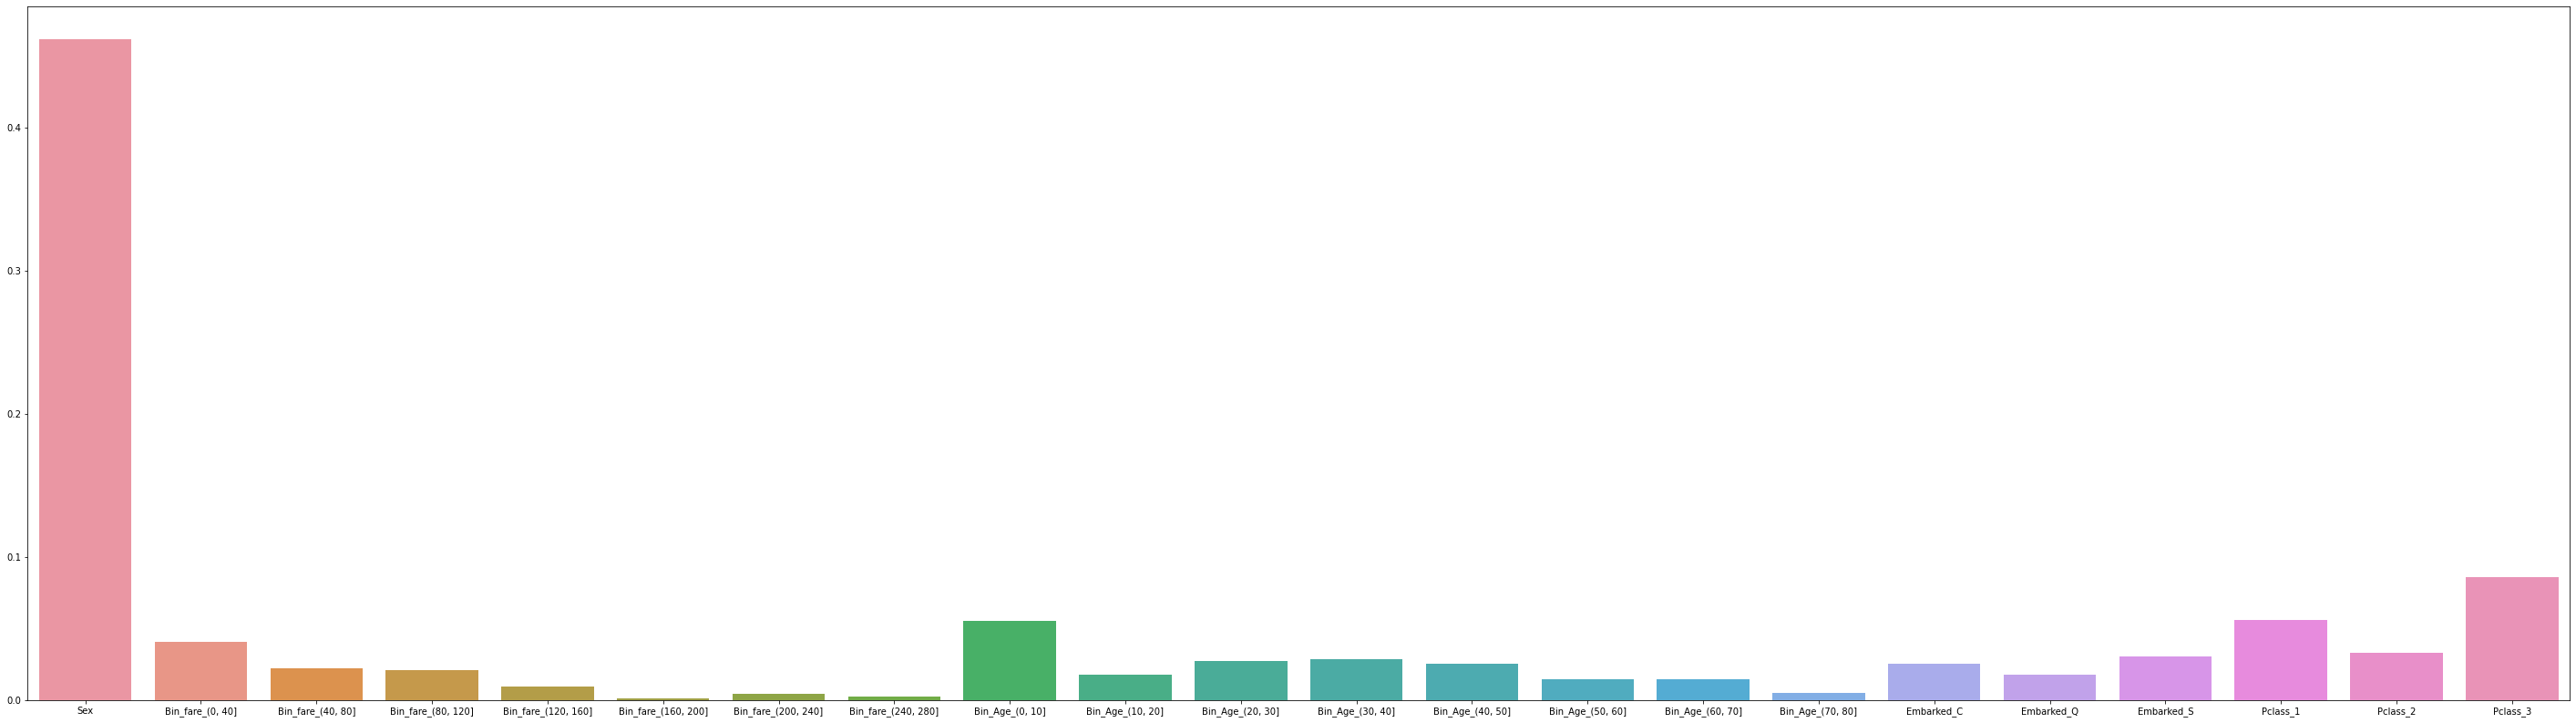

In [219]:
plt.figure(figsize=(50, 14))
sns.barplot(x = X_train.columns, y = model_inter.feature_importances_, )

In [220]:
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

In [221]:
print('f1_score for the model is {}'.format(f1_score(y_test, model_inter.predict(X_test))))

f1_score for the model is 0.7714285714285715


In [222]:
print('accuracy for the model is {}'.format(accuracy_score(y_test, model_inter.predict(X_test))))

accuracy for the model is 0.8504672897196262


In [223]:
confusion_matrix(y_test, model_inter.predict(X_test))

array([[64,  2],
       [14, 27]], dtype=int64)

In [224]:
print('accuracy for training model is {}'.format(accuracy_score(y_train, model_inter.predict(X_train))))

accuracy for training model is 0.8494897959183674


In [225]:
confusion_matrix(y_train, model_inter.predict(X_train))

array([[448,  35],
       [ 83, 218]], dtype=int64)

In [226]:
model_inter_tune = RandomForestClassifier()

## Parameter tuning

In [237]:
from sklearn.model_selection import RandomizedSearchCV

In [238]:
parameter_test = {   'n_estimators':[1100, 1200, 200, 1000, 1250, 500],
                      'max_depth': [None, 3, 4, 5, 6, 7],
                      'criterion': ['gini', 'entorpy'], 
                      'ccp_alpha': [0.0017, 0.0015, 0.0, 0.0021, 0.0035, 0.0055, 0.0075, 0.0099],
                      'min_samples_split': [2, 4, 5, 1, 6],
                      'max_features':['auto', 3, 4, 7, 8, 6, 10]
                    }

In [239]:
clf = RandomizedSearchCV(estimator = model_inter_tune,param_distributions = parameter_test, n_iter = 40,
                         scoring = 'accuracy',
                         n_jobs = -1, random_state = 0, cv = 10)

In [240]:
clf.fit(X, y)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.0017, 0.0015, 0.0,
                                                      0.0021, 0.0035, 0.0055,
                                                      0.0075, 0.0099],
                                        'criterion': ['gini', 'entorpy'],
                                        'max_depth': [None, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 3, 4, 7, 8, 6,
                                                         10],
                                        'min_samples_split': [2, 4, 5, 1, 6],
                                        'n_estimators': [1100, 1200, 200, 1000,
                                                         1250, 500]},
                   random_state=0, scoring='accuracy')

In [241]:
clf.best_params_

{'n_estimators': 1100,
 'min_samples_split': 4,
 'max_features': 6,
 'max_depth': 6,
 'criterion': 'gini',
 'ccp_alpha': 0.0}

In [242]:
clf.best_score_

0.8226841448189763

In [243]:
model_param_hyper_tuned = RandomForestClassifier(n_estimators = 1100, min_samples_split = 4,
                                                 max_features = 6,
                                                 max_depth = 6,
                                                 criterion = 'gini',
                                                 ccp_alpha = 0.0,
                                                 oob_score = True,
                                                 n_jobs = -1,
                                                 random_state = 0,
                                                 verbose = 0)

In [244]:
model_param_hyper_tuned.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, max_features=6, min_samples_split=4,
                       n_estimators=1100, n_jobs=-1, oob_score=True,
                       random_state=0)

In [245]:
print('f1_score for the model is {}'.format(f1_score(y_test, model_param_hyper_tuned.predict(X_test))))

f1_score for the model is 0.7352941176470589


In [246]:
print('accuracy is {}'.format(accuracy_score(y_test, model_param_hyper_tuned.predict(X_test))))

accuracy is 0.8317757009345794


In [247]:
confusion_matrix(y_train, model_param_hyper_tuned.predict(X_train))

array([[462,  21],
       [111, 190]], dtype=int64)

In [248]:
confusion_matrix(y_test, model_param_hyper_tuned.predict(X_test))

array([[64,  2],
       [16, 25]], dtype=int64)

In [249]:
accuracy_score(y_train, model_param_hyper_tuned.predict(X_train))

0.8316326530612245

From all the results we have seen I conclude that we need some more features probably because we have used 2 models one which fit the training set too well that didn't perform well on the dev set and the other didn't fit the training set too well but performed good on the dev(bias variance trade off) maybe we can try increasing the bias a little bit more but I don't think it will help so we need more training data i.e. more features because more data is not available .

After trying to add some more features we have got a result of 0.77 on the traininig set now we will try increasing it by using a better model if it does not get better then we will try adding some more features like is_married and stuff which are complex features.

In [260]:
from sklearn.ensemble import GradientBoostingClassifier
model_2_inter = GradientBoostingClassifier()

In [261]:
model_2_inter.fit(X_train, y_train)

GradientBoostingClassifier()

C:\Users\Anirban\anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:>

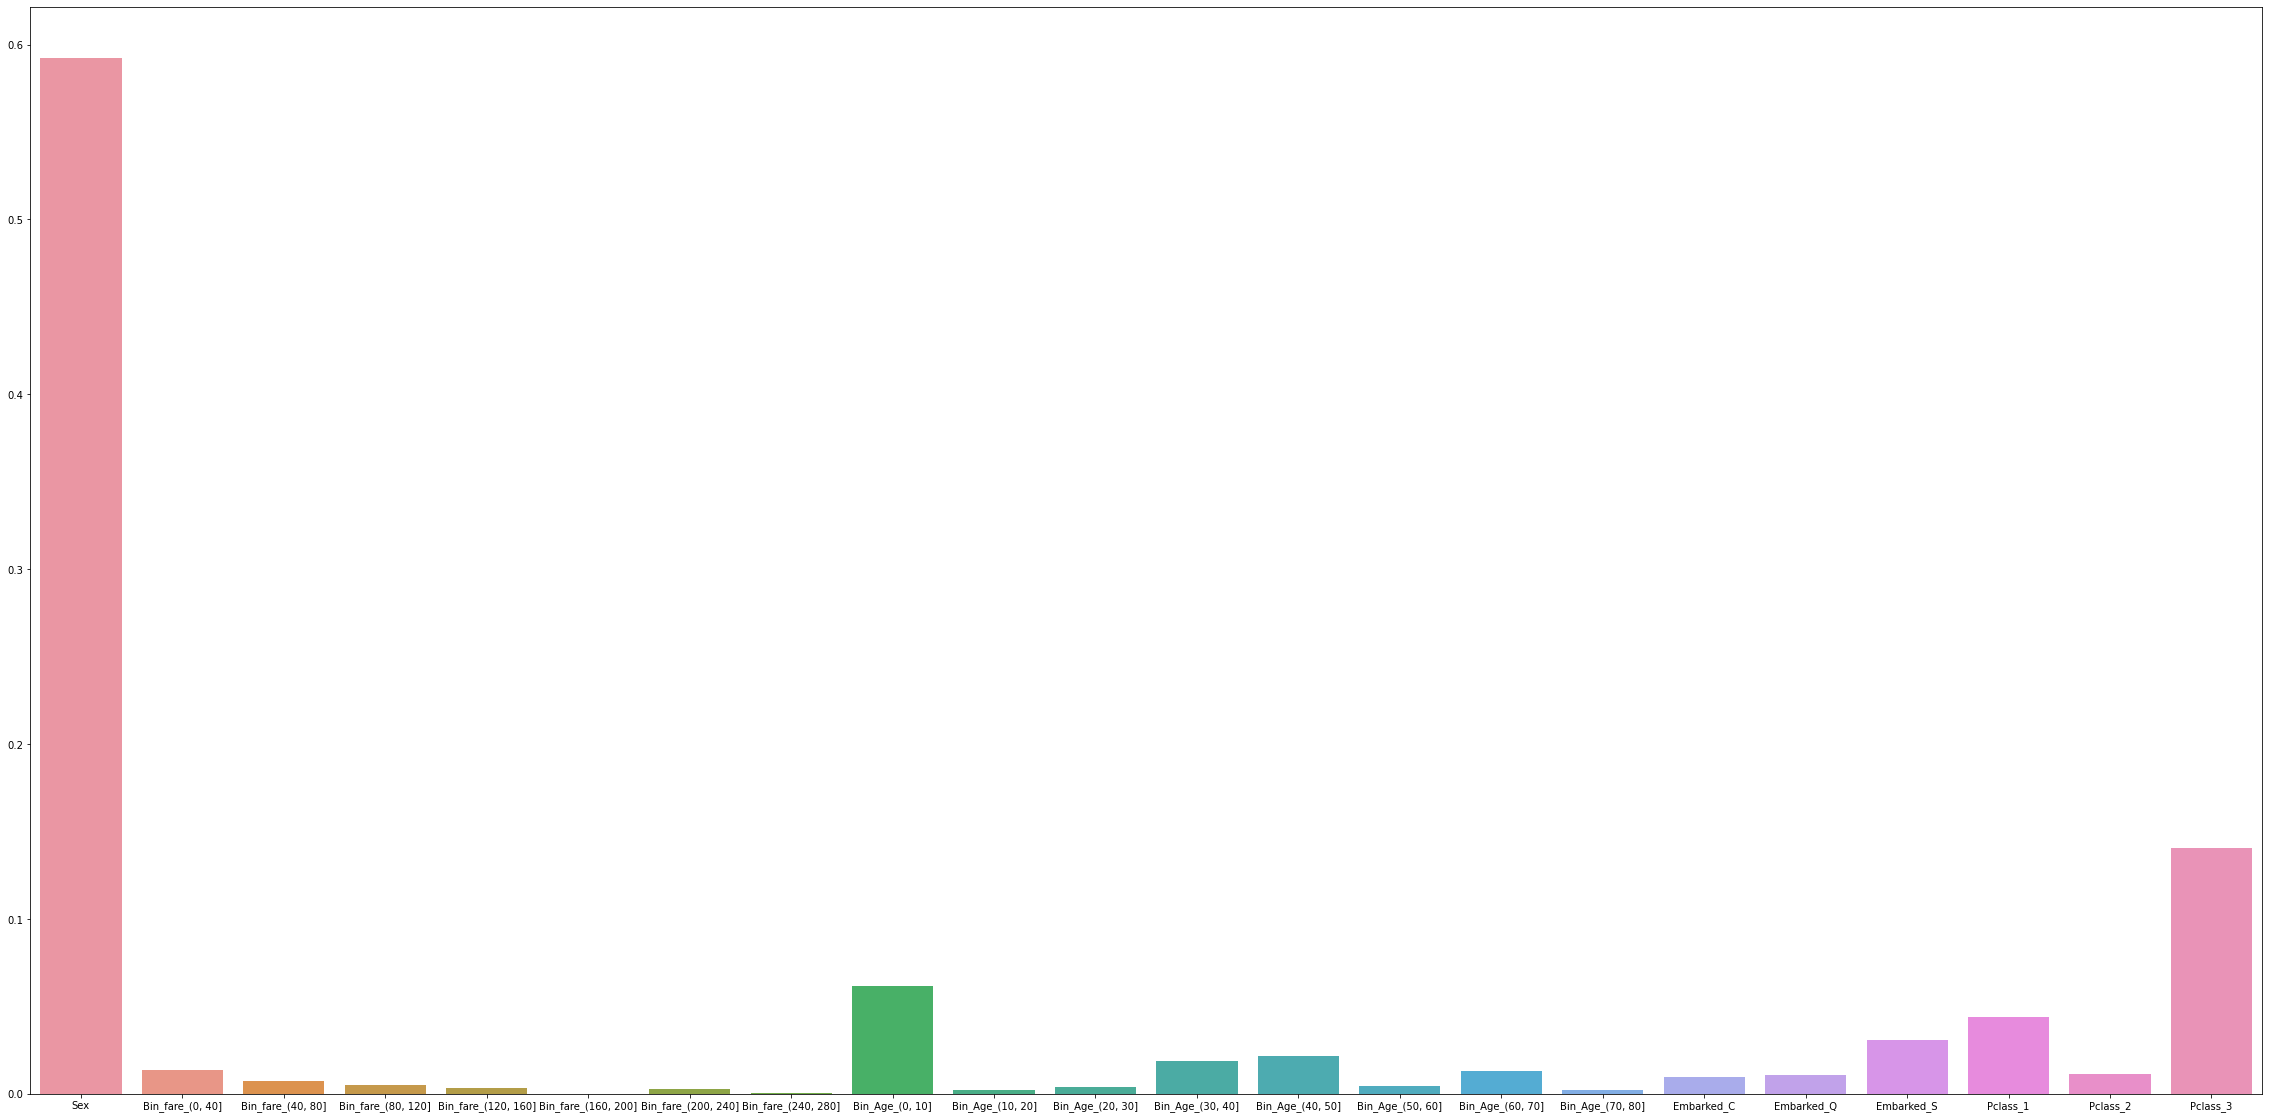

In [262]:
plt.figure(figsize = (40, 20))
sns.barplot(X_train.columns,model_2_inter.feature_importances_)

In [263]:
print('accuracy on the test set is:{}'.format(accuracy_score(y_test, model_2_inter.predict(X_test))))

accuracy on the test set is:0.822429906542056


In [264]:
print('f1 score on the test is :{}'.format(f1_score(y_test, model_2_inter.predict(X_test))))

f1 score on the test is :0.7164179104477613


In [265]:
print('accuracy on the train is :{}'.format(accuracy_score(y_train, model_2_inter.predict(X_train))))

accuracy on the train is :0.8380102040816326


In [266]:
parameter_test_2 = {'n_estimators':[100, 1200, 200, 1000, 150, 500, 1300, 1500],
                    'learning_rate':[0.01, 0.025, 0.075, 0.1, 0.2, 0.3],
                      'max_depth': [None, 3, 4, 5, 6, 7], 
                      'ccp_alpha': [0.001, 0.0017, 0.0015, 0.0012, 0.0, 0.01],
                      'min_samples_split': [2, 4, 5, 6],
                      'max_features':['auto', 3, 4, 7, 8, 6, 10]}

In [267]:
clf_2 = RandomizedSearchCV(model_2_inter, parameter_test_2, n_iter = 40, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [268]:
clf_2.fit(X, y)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(), n_iter=40,
                   n_jobs=-1,
                   param_distributions={'ccp_alpha': [0.001, 0.0017, 0.0015,
                                                      0.0012, 0.0, 0.01],
                                        'learning_rate': [0.01, 0.025, 0.075,
                                                          0.1, 0.2, 0.3],
                                        'max_depth': [None, 3, 4, 5, 6, 7],
                                        'max_features': ['auto', 3, 4, 7, 8, 6,
                                                         10],
                                        'min_samples_split': [2, 4, 5, 6],
                                        'n_estimators': [100, 1200, 200, 1000,
                                                         150, 500, 1300,
                                                         1500]},
                   scoring='accuracy')

In [269]:
clf_2.best_params_

{'n_estimators': 150,
 'min_samples_split': 5,
 'max_features': 8,
 'max_depth': None,
 'learning_rate': 0.01,
 'ccp_alpha': 0.0012}

In [270]:
clf_2.best_score_

0.8282771535580524

In [271]:
model_param_hyper_tuned_2 = GradientBoostingClassifier(n_estimators = 160,
                                                       min_samples_split = 5,
                                                       max_features = 8,
                                                       max_depth = None,
                                                       learning_rate = 0.01,
                                                       ccp_alpha = 0.001, random_state = 3)

In [272]:
model_param_hyper_tuned_2.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.001, learning_rate=0.01, max_depth=None,
                           max_features=8, min_samples_split=5,
                           n_estimators=160, random_state=3)

In [275]:
print('accuracy on the test set is:{}'.format(accuracy_score(y_test, model_param_hyper_tuned_2.predict(X_test))))

accuracy on the test set is:0.822429906542056


In [277]:
print('f1 score of gradient boost is:{}'.format(f1_score(y_test, model_param_hyper_tuned_2.predict(X_test))))

f1 score of gradient boost is:0.7164179104477613


In [278]:
print('accuracy on the training set is:{}'.format(accuracy_score(y_train, model_param_hyper_tuned_2.predict(X_train))))

accuracy on the training set is:0.826530612244898


In [279]:
confusion_matrix(y_test, model_param_hyper_tuned_2.predict(X_test))

array([[64,  2],
       [17, 24]], dtype=int64)

In [280]:
confusion_matrix(y_train, model_param_hyper_tuned_2.predict(X_train))

array([[463,  20],
       [116, 185]], dtype=int64)

Okay so we will try combining the test and training set because performance on the training dev set isn't translating to the test set.

## Submission

In [286]:
y_submission = model_param_hyper_tuned_2.predict(X_dev)

In [287]:
submission_file = pd.DataFrame(columns = ['PassengerId', 'Survived'])

In [288]:
submission_file['PassengerId'] = submission_index
submission_file['Survived'] = y_submission

In [289]:
submission_file

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [290]:
submission_file.to_csv('comma/solutions.csv', index = False)